In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data/housing.data', delim_whitespace=True, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

## Exploratory data analysis

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
studies = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM']

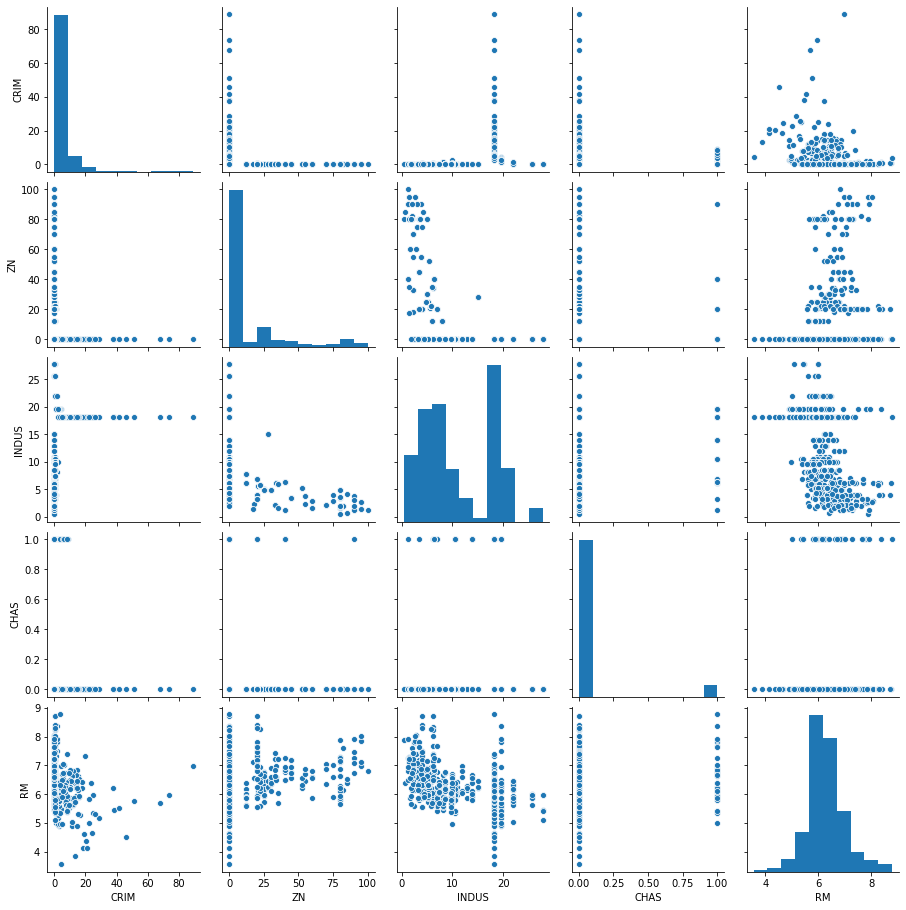

In [7]:
sns.pairplot(df[studies], height=2.5)

In [8]:
more = ['PTRATIO', 'B', 'LSTAT', 'MEDV']

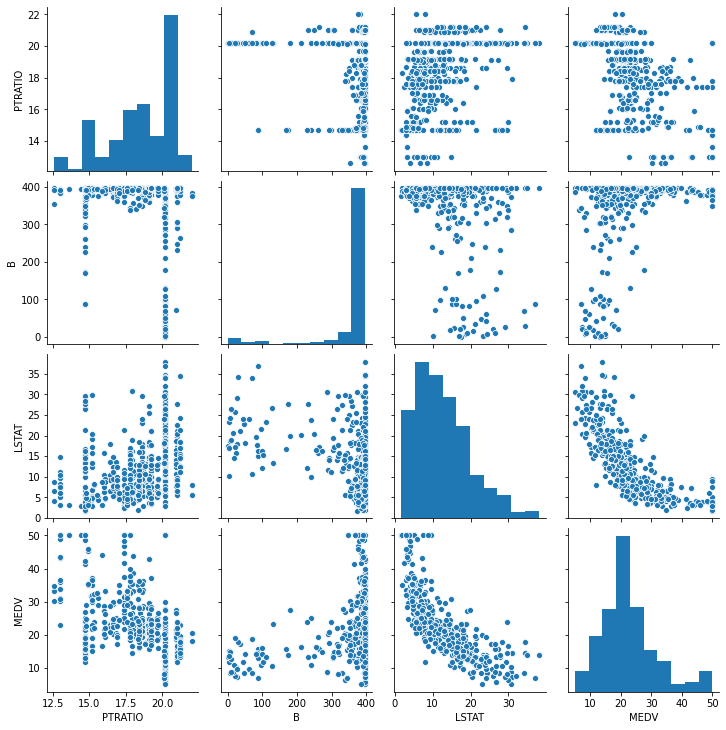

In [9]:
sns.pairplot(df[more], height=2.5)

## Correlation Analysis and Feature Selection

In [10]:
pd.options.display.float_format = '{:,.3f}'.format

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


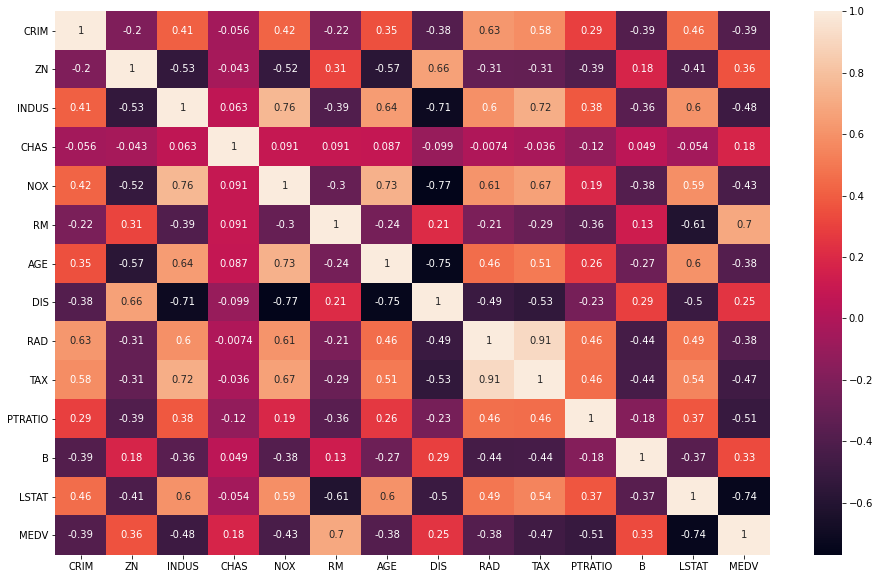

In [12]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)

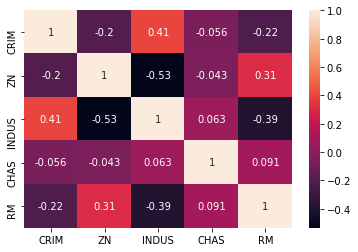

In [13]:
sns.heatmap(df[studies].corr(), annot=True)

Note: you may add features iteratively, rather than by cap of absolute value of correlation, seeing for each addition how much predictions change.

## Linear Regression with scikit-learn

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [15]:
X = df.RM.values.reshape(-1, 1)

In [16]:
y = df.MEDV.values

In [17]:
model = LinearRegression()

In [18]:
model.fit(X, y)

LinearRegression()

In [19]:
model.coef_

array([9.10210898])

In [20]:
model.intercept_

-34.67062077643857

Text(0, 0.5, "Median value of owner-occupied homes in $1000's")

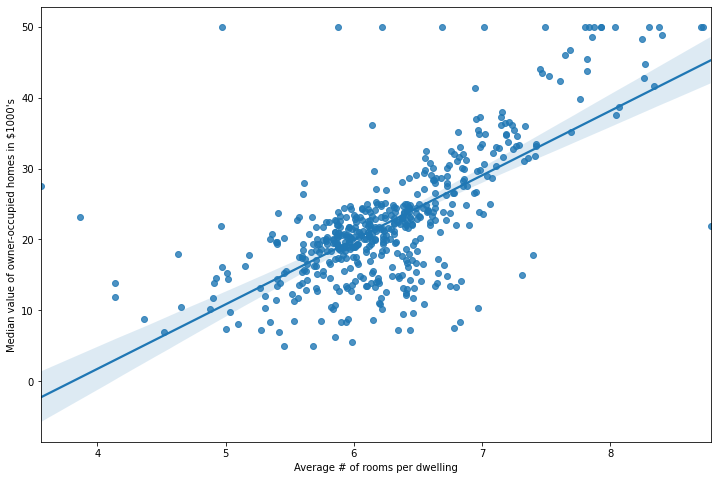

In [21]:
plt.figure(figsize=(12, 8))
sns.regplot(X, y)
plt.xlabel('Average # of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')

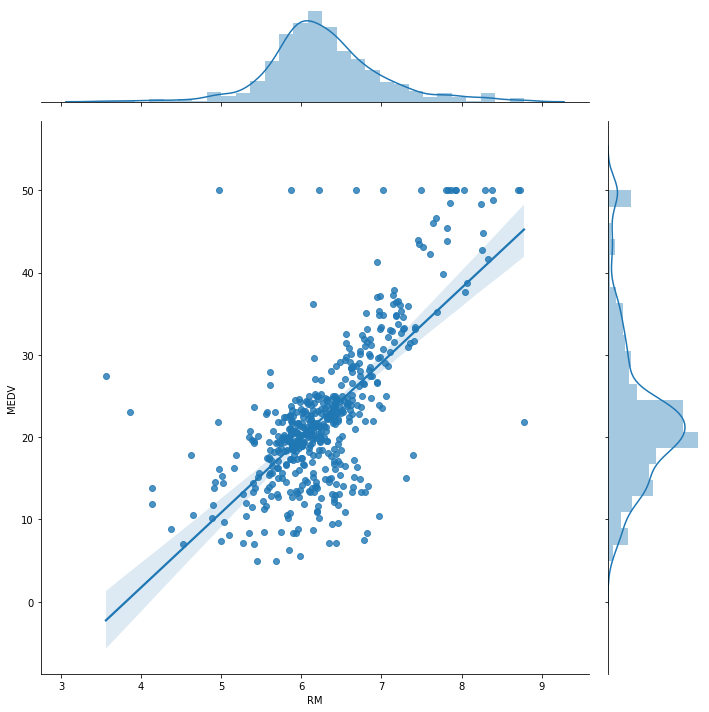

In [22]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', size=10)

1. Choose the model
2. Obtain the data
3. Instantiate a scikit learn model
4. Fit the data
5. Make a prediction

In [23]:
model.predict(np.array([5]).reshape(-1, 1))

array([10.83992413])

In [24]:
model.predict(np.array([7]).reshape(-1, 1))

array([29.04414209])

Below is from Jacob T. VanderPlas text, Python Data Science Handbook: Essential Tools for Working with Data

Basics of the API:

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow):

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
   * For supervised learning, often we predict labels for unknown data using the predict() method.
   * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [25]:
model = LinearRegression()
X = df.LSTAT.values.reshape(-1, 1)
y = df.MEDV.values
model.fit(X, y)
model.predict(np.array([15]).reshape(-1, 1))

array([20.30310057])

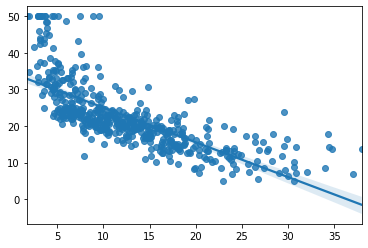

In [26]:
sns.regplot(X, y)

## Robust Regression

### RANdom SAmple Consensus (RANSAC) Algorithm

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [27]:
ransac = RANSACRegressor()

In [28]:
ransac.fit(X, y)

RANSACRegressor()

In [29]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [30]:
lx = np.arange(3, 10, 1)
ly = ransac.predict(lx.reshape(-1, 1))

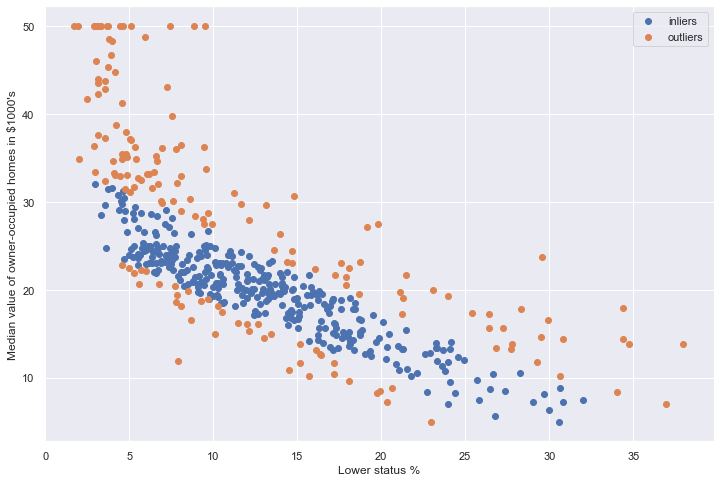

In [31]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12, 8))
plt.scatter(X[inlier_mask], y[inlier_mask], label='inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], label='outliers')
plt.xlabel('Lower status %')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.legend(loc='best')

## Performance Evaluation of Regression Model

In [32]:
X = df.iloc[:, :-1].values

In [33]:
y = df.MEDV.values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
y_train_pred = lr.predict(X_train)

In [38]:
y_test_pred = lr.predict(X_test)

### Method 1: Residual Analysis

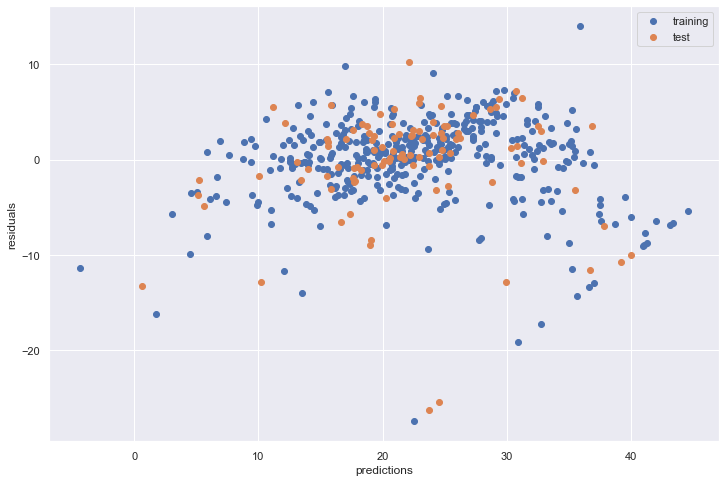

In [39]:
plt.figure(figsize=(12, 8))
plt.scatter(y_train_pred, y_train_pred - y_train, label='training')
plt.scatter(y_test_pred, y_test_pred - y_test, label='test')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend(loc='best')

### Method 2: Mean Squared Error

$$MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}$$

In [40]:
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [41]:
mean_squared_error(y_test, y_test_pred)

33.44897999767657

### Method 3: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [42]:
r2_score(y_train, y_train_pred)

0.7730135569264234

In [43]:
r2_score(y_test, y_test_pred)

0.5892223849182503